## Outlier Treatment

In [35]:
import numpy as np

import pandas as pd

import matplotlib as plt

import seaborn as sns

from scipy import stats



In [18]:
data = pd.read_excel("diabetes (1).xlsx")

In [19]:
data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    float64
 1   Glucose                     768 non-null    float64
 2   Blood Pressure              768 non-null    float64
 3   Skin Thickness              768 non-null    float64
 4   Insulin                     768 non-null    float64
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    float64
 8   Outcome                     768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [21]:
data.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

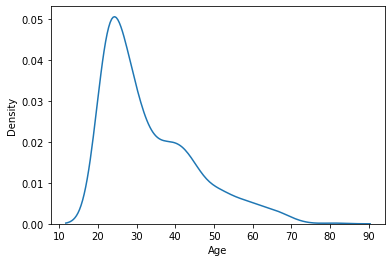

In [22]:
sns.kdeplot(data['Age'])

<AxesSubplot:ylabel='Age'>

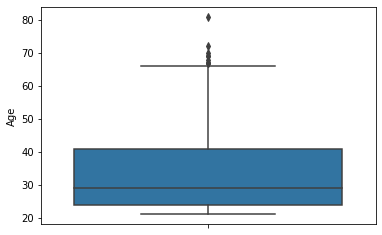

In [23]:
sns.boxplot(y = data['Age'])

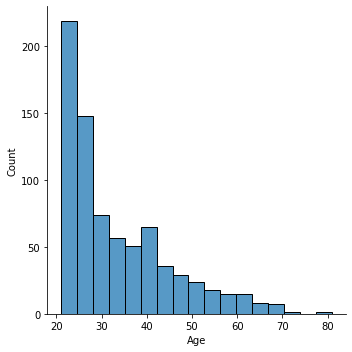

In [24]:
sns.displot(data['Age'])

In [41]:
z = stats.zscore(data['Age'])
print(z)

0      1.425995
1     -0.190672
2     -0.105584
3     -1.041549
4     -0.020496
         ...   
763    2.532136
764   -0.531023
765   -0.275760
766    1.170732
767   -0.871374
Name: Age, Length: 768, dtype: float64


In [42]:
threshold = 3 

b = np.where(z >3)

print(np.where(z > 3))

(array([123, 453, 459, 666, 684], dtype=int64),)


In [43]:
print(np.where(z<-3))

(array([], dtype=int64),)


### Outlier etection and removal with IQR

In [45]:
data.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)

In [48]:
Q1

24.0

In [49]:
Q3

41.0

In [51]:
IQR = Q3-Q1
IQR

17.0

In [52]:
low_lim = Q1 -1.5 *IQR
high_lim = Q3 +1.5 *IQR

In [56]:
data = data[(data['Age'] > low_lim) & (data['Age'] < high_lim)]

In [57]:
data.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,3.831357,120.807642,69.110672,20.712780,80.666667,32.073254,0.471219,32.805007,0.350461
std,3.373499,31.913470,19.276378,15.917141,115.630420,7.809938,0.332522,11.113182,0.477429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,129.500000,36.600000,0.625000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,66.000000,1.000000


In [58]:
data.shape

(759, 9)